<a href="https://colab.research.google.com/github/CharlotteY2003/SavedHelpingHand/blob/master/MSE_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
X,y = make_regression(n_samples = 1000, n_features = 20, noise = .1, random_state = 1)

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(len(y),1))[:,0]

In [4]:
n_train = 500
X_train, X_test = X[:n_train,:], X[n_train:,:]
y_train, y_test = y[:n_train], y[n_train:]

In [5]:
model = Sequential()
model.add(Dense(25, input_dim = 20, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
optimizer = SGD(learning_rate=.01, momentum=.9)
model.compile(optimizer = optimizer, loss = 'mse')

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, verbose = 100)

In [7]:
train_mse = model.evaluate(X_train, y_train, verbose = 0)
val_mse = model.evaluate(X_train, y_test, verbose =0)
print(train_mse, val_mse)

0.003195545868948102 1.8566515445709229


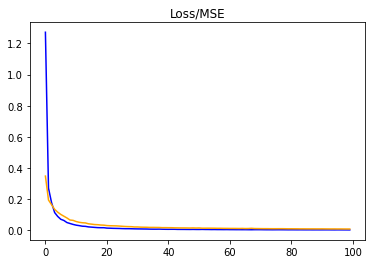

<Figure size 432x288 with 0 Axes>

In [9]:
plt.title('Loss/MSE')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')
plt.show()
plt.savefig('MSEgraph.png')